In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# File paths
train_path = 'train.csv'
test_path = 'test.csv'
submission_path = 'sample_submission.csv'
wetter_path = 'wetter.csv'

# Load data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)
weather_df = pd.read_csv(wetter_path)



In [3]:
# Convert 'Datum' to datetime
train_df['Datum'] = pd.to_datetime(train_df['Datum'])
test_df['Datum'] = pd.to_datetime(test_df['Datum'])
weather_df['Datum'] = pd.to_datetime(weather_df['Datum'])

# Merge weather data with training data
train_df = pd.merge(train_df, weather_df, on='Datum', how='left')

# Handle missing values in weather data (e.g., fill with mean or median)
train_df['Wettercode'].fillna(train_df['Wettercode'].mean(), inplace=True)


/var/folders/dj/25v6vr455d19qn46v_ppyy0c0000gn/T/ipykernel_48605/3109174244.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Wettercode'].fillna(train_df['Wettercode'].mean(), inplace=True)


In [4]:
# Feature engineering: extract time-based features
train_df['Wochentag'] = train_df['Datum'].dt.weekday
train_df['Monat'] = train_df['Datum'].dt.month
train_df['Jahr'] = train_df['Datum'].dt.year

test_df['Wochentag'] = test_df['Datum'].dt.weekday
test_df['Monat'] = test_df['Datum'].dt.month
test_df['Jahr'] = test_df['Datum'].dt.year

# Verify new features
print(train_df.head(), test_df.head())


        id      Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0  1307011 2013-07-01            1  148.828353         6.0     17.8375   
1  1307021 2013-07-02            1  159.793757         3.0     17.3125   
2  1307031 2013-07-03            1  111.885594         7.0     21.0750   
3  1307041 2013-07-04            1  168.864941         7.0     18.8500   
4  1307051 2013-07-05            1  171.280754         5.0     19.9750   

   Windgeschwindigkeit  Wettercode  Wochentag  Monat  Jahr  
0                 15.0   20.000000          0      7  2013  
1                 10.0   36.900128          1      7  2013  
2                  6.0   61.000000          2      7  2013  
3                  7.0   20.000000          3      7  2013  
4                 12.0   36.900128          4      7  2013           id      Datum  Warengruppe  Wochentag  Monat  Jahr
0  1808011 2018-08-01            1          2      8  2018
1  1808021 2018-08-02            1          3      8  2018
2  1808031 2

In [5]:
# Define features and target variable
features = ['Warengruppe', 'Wochentag', 'Monat', 'Jahr', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']
target = 'Umsatz'

# Separate features and target variable in the training set
X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify scaled features
print(X_train_scaled[:5], X_test_scaled[:5])


KeyError: "['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode'] not in index"

In [11]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)





Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 57022.6523 - val_loss: 50237.0391
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26396.1895 - val_loss: 31594.9043
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21364.1699 - val_loss: 27409.7871
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21248.2832 - val_loss: 26208.8027
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19926.8516 - val_loss: 25142.5371
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20587.8418 - val_loss: 25453.9941
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20955.1211 - val_loss: 24878.5195
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20475.3965 - val_loss: 25833.0371
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21139.6895 - val_loss: 25843.8457
Epoch 10/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20734.3379 - val_loss: 25028.2910
Epoch 11/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20173.896

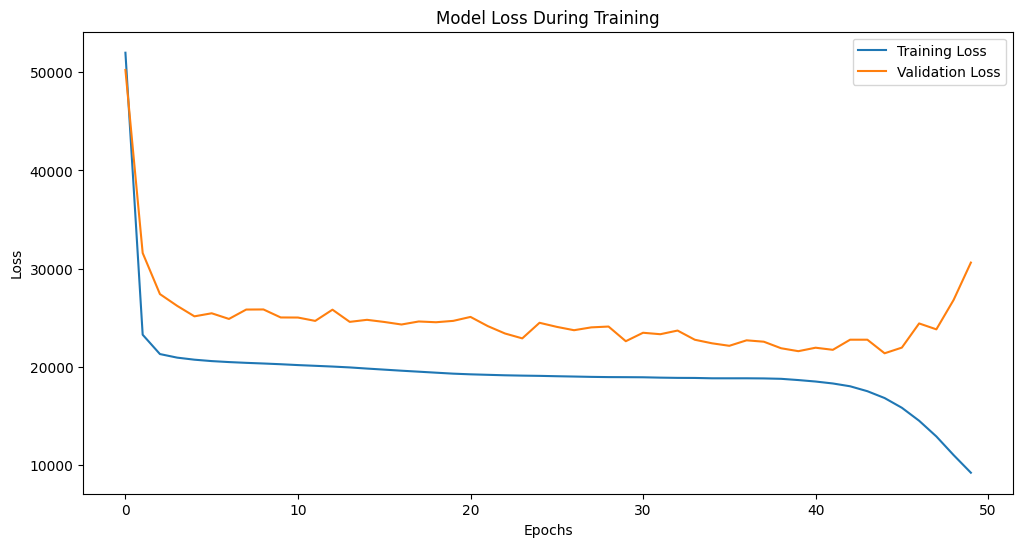

In [12]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [13]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Save predictions to sample_submission.csv
submission_df['Umsatz'] = predictions
submission_df.to_csv('Vorhersage.csv', index=False)

# Display the first few rows of the submission file
print(submission_df.head())



58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,id,Umsatz
0,1808011,199.077484
1,1808021,202.673676
2,1808031,212.135590
3,1808041,232.292053
4,1808051,260.361389
